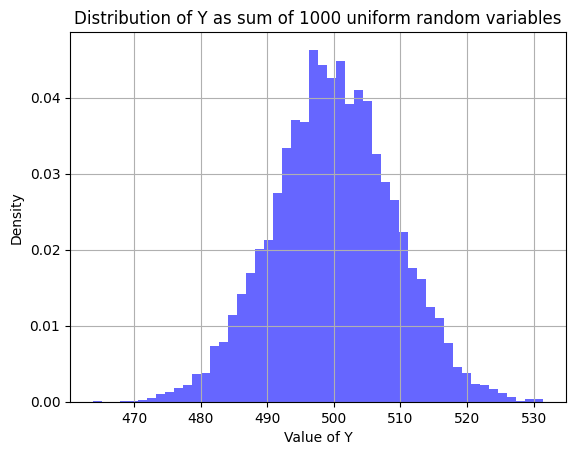

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sample(k, a, b, n_samples):
    X = np.random.uniform(low=a, high=b, size=(n_samples, k))
    Y = np.sum(X, axis=1)
    return Y

k = 1000
a = 0.0
b = 1.0
n_samples = 10000

Y = generate_sample(k, a, b, n_samples)
plt.hist(Y, bins=50, density=True, alpha=0.6, color='b')
plt.title(f"Distribution of Y as sum of {k} uniform random variables")
plt.xlabel("Value of Y")
plt.ylabel("Density")
plt.grid(True)
plt.show()

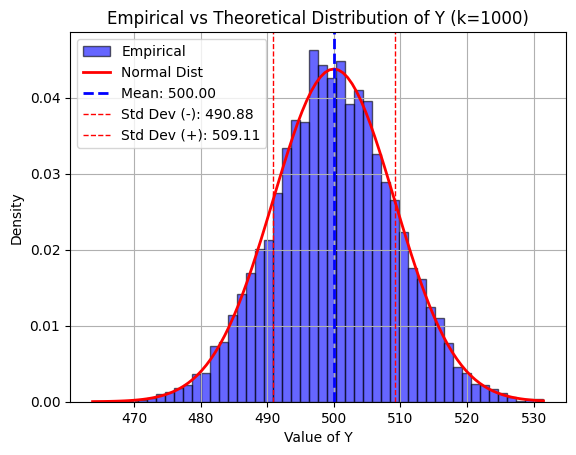

In [ ]:
from scipy.stats import norm

mu, std = np.mean(Y), np.std(Y)
xmin, xmax = min(Y), max(Y)
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)

plt.hist(Y, bins=50, density=True, alpha=0.6, color='b', edgecolor='black', label='Empirical')
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Dist')
plt.axvline(mu, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mu:.2f}')
plt.axvline(mu - std, color='red', linestyle='--', linewidth=1, label=f'Std Dev (-): {mu-std:.2f}')
plt.axvline(mu + std, color='red', linestyle='--', linewidth=1, label=f'Std Dev (+): {mu+std:.2f}')
plt.title(f"Empirical vs Theoretical Distribution of Y (k={k})")
plt.xlabel("Value of Y")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-3-a2d4ef0b6d39>:27: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  pdf = (1 / (2**(k/2) * np.math.gamma(k/2))) * x**(k/2 - 1) * np.exp(-x/2)
<ipython-input-3-a2d4ef0b6d39>:27: RuntimeWarning: divide by zero encountered in power
  pdf = (1 / (2**(k/2) * np.math.gamma(k/2))) * x**(k/2 - 1) * np.exp(-x/2)


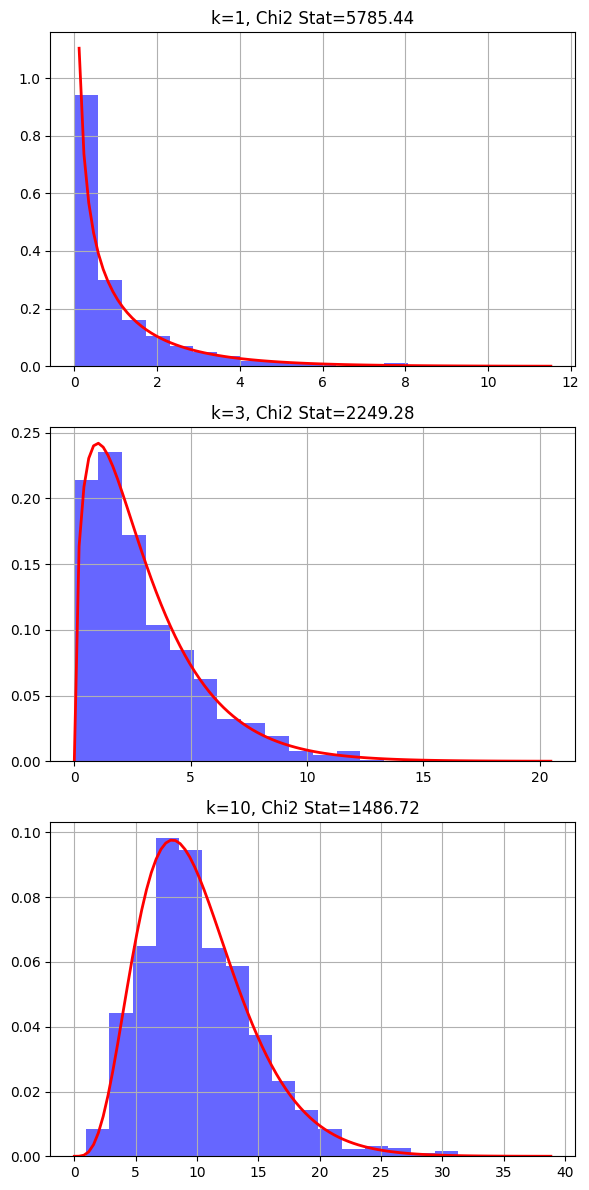

In [ ]:
from scipy.stats import chisquare

def generate_chi_squared_samples(k_values, n_elements):
    results = {}
    for k in k_values:
        samples = np.random.normal(size=(k, n_elements))**2
        chi_squared_samples = np.sum(samples, axis=0)
        results[k] = chi_squared_samples
    return results

def perform_chi_squared_test(data, bins):
    observed_freq, bin_edges = np.histogram(data, bins=bins)
    expected_freq = np.full_like(observed_freq, np.mean(observed_freq))
    chi2_stat, p_value = chisquare(f_obs=observed_freq, f_exp=expected_freq)
    return chi2_stat, p_value

k_values = [1, 3, 10]
n_elements = 1000
bins = 20
chi_squared_data = generate_chi_squared_samples(k_values, n_elements)
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

for i, k in enumerate(k_values):
    axs[i].hist(chi_squared_data[k], bins=bins, density=True, alpha=0.6, color='b')
    chi2_stat, p_value = perform_chi_squared_test(chi_squared_data[k], bins)
    x = np.linspace(0, max(chi_squared_data[k]), 100)
    pdf = (1 / (2**(k/2) * np.math.gamma(k/2))) * x**(k/2 - 1) * np.exp(-x/2)
    axs[i].plot(x, pdf, 'r-', lw=2)
    axs[i].set_title(f"k={k}, Chi2 Stat={chi2_stat:.2f}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

<ipython-input-4-eb8d183e7ace>:15: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  expected_freq = (1 / (2**(k/2) * np.math.gamma(k/2))) * x_mid**(k/2 - 1) * np.exp(-x_mid/2)


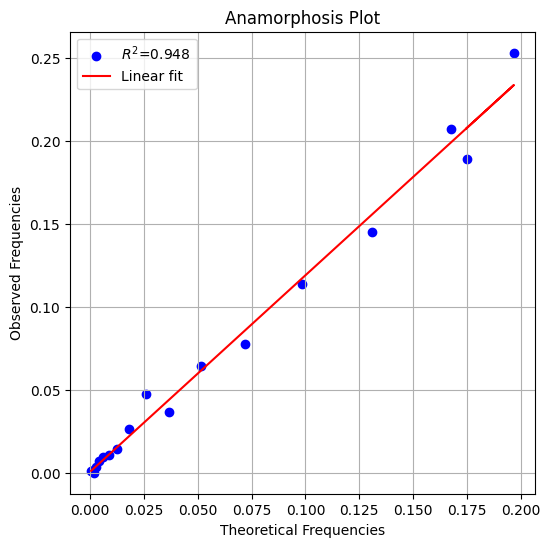

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def calculate_r_squared_single(observed, predicted):
    ss_res = np.sum((observed - predicted) ** 2)
    ss_tot = np.sum((observed - np.mean(observed)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def plot_anamorphosis_with_regression(chi_squared_data, k, bins):
    observed_freq, bin_edges = np.histogram(chi_squared_data, bins=bins, density=True)
    x_mid = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    expected_freq = (1 / (2**(k/2) * np.math.gamma(k/2))) * x_mid**(k/2 - 1) * np.exp(-x_mid/2)
    expected_freq *= (bin_edges[1] - bin_edges[0])

    r_squared = calculate_r_squared_single(observed_freq, expected_freq)

    model = LinearRegression().fit(expected_freq.reshape(-1, 1), observed_freq)
    y_pred = model.predict(expected_freq.reshape(-1, 1))

    plt.figure(figsize=(6, 6))
    plt.scatter(expected_freq, observed_freq, color='blue', label=f'$R^2$={r_squared:.3f}')
    plt.plot(expected_freq, y_pred, color='red', label='Linear fit')
    plt.title("Anamorphosis Plot")
    plt.xlabel("Theoretical Frequencies")
    plt.ylabel("Observed Frequencies")
    plt.grid(True)
    plt.legend()
    plt.show()

k = 3
bins = 20
chi_squared_data = {k: np.random.chisquare(k, size=1000)}
plot_anamorphosis_with_regression(chi_squared_data[k], k, bins)

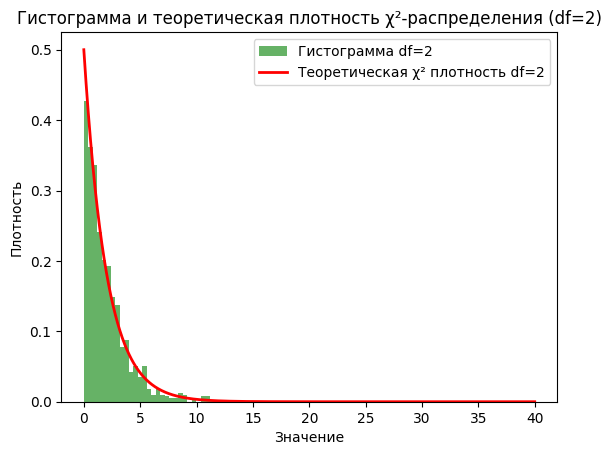

χ² статистика: 38.06
p-значение: 0.0000000054


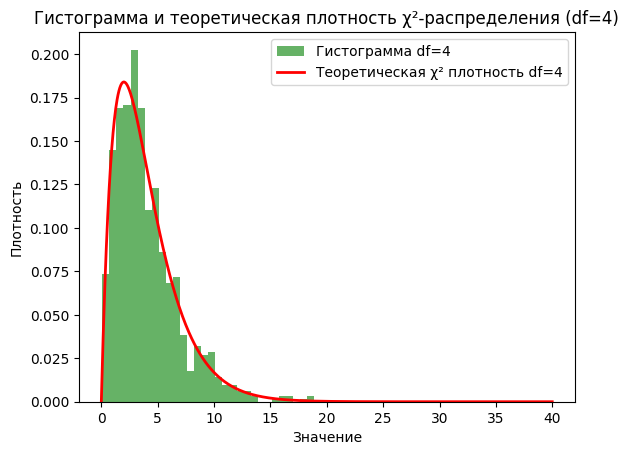

χ² статистика: 44.94
p-значение: 0.0000000041


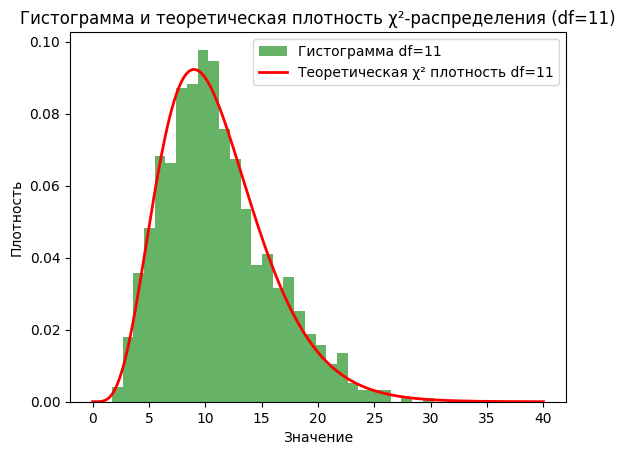

χ² статистика: 20.92
p-значение: 0.0341598885


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def plot_chi2_distribution(df):
    mu = 0
    sigma = 1
    sample_size = 1000

    L = np.random.normal(mu, sigma, (sample_size, df))
    R = np.sum(L**2, axis=1)

    plt.hist(R, bins=30, density=True, alpha=0.6, color='g', label=f'Гистограмма df={df}')
    x = np.linspace(0, 40, 1000)
    plt.plot(x, chi2.pdf(x, df), 'r-', lw=2, label=f'Теоретическая χ² плотность df={df}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.title(f'Гистограмма и теоретическая плотность χ²-распределения (df={df})')
    plt.legend()
    plt.show()

    observed_freq, bins = np.histogram(R, bins=30)
    expected_freq = chi2.cdf(bins[1:], df) - chi2.cdf(bins[:-1], df)
    expected_freq *= sample_size
    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    p_value = 1 - chi2.cdf(chi2_stat, df)

    print(f'χ² статистика: {chi2_stat:.2f}')
    print(f'p-значение: {p_value:.10f}')

df_values = [2, 4, 11]
for df in df_values:
    plot_chi2_distribution(df)


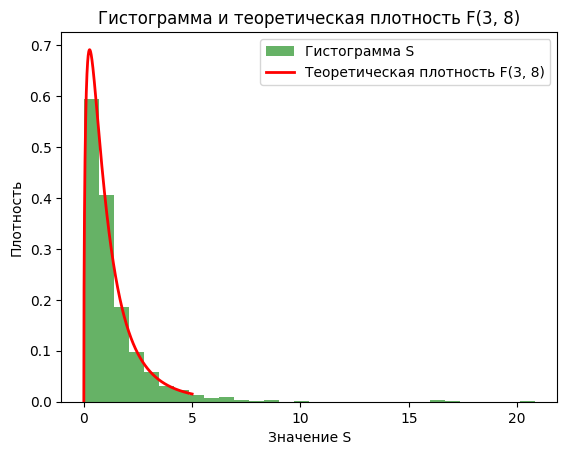

d1 = 3, d2 = 8
χ² статистика: 61.45
p-значение: 0.0001699657
--------------------------------------------------


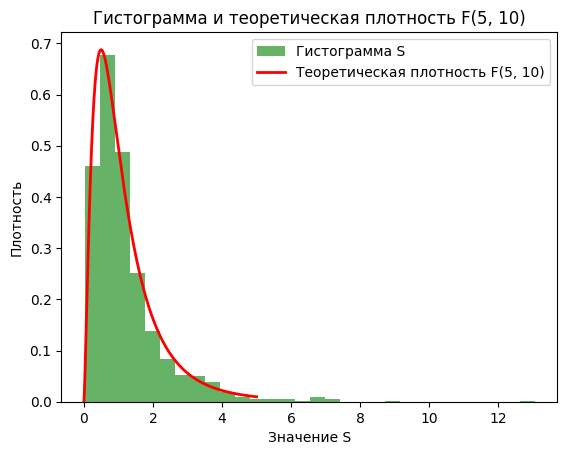

d1 = 5, d2 = 10
χ² статистика: 39.55
p-значение: 0.0563622656
--------------------------------------------------


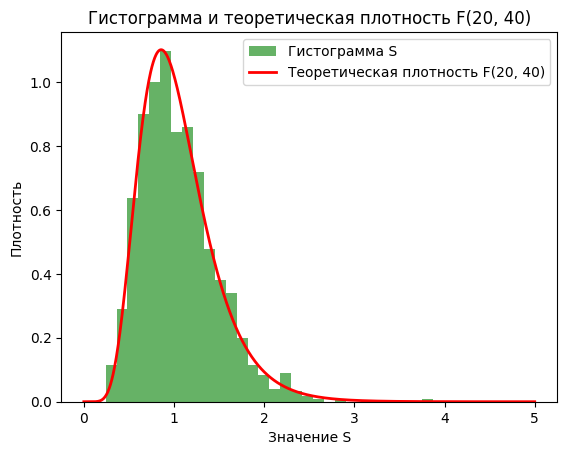

d1 = 20, d2 = 40
χ² статистика: 39.20
p-значение: 0.0607248169
--------------------------------------------------


In [ ]:
from scipy.stats import f, chi2
def experiment_f_distribution(d1, d2):
    sample_size = 1000
    Y1 = np.random.chisquare(d1, sample_size)
    Y2 = np.random.chisquare(d2, sample_size)
    S = (Y1 / d1) / (Y2 / d2)

    plt.hist(S, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма S')
    x = np.linspace(0, 5, 1000)
    plt.plot(x, f.pdf(x, d1, d2), 'r-', lw=2, label=f'Теоретическая плотность F({d1}, {d2})')

    plt.xlabel('Значение S')
    plt.ylabel('Плотность')
    plt.title(f'Гистограмма и теоретическая плотность F({d1}, {d2})')
    plt.legend()
    plt.show()

    observed_freq, bins = np.histogram(S, bins=30)
    expected_freq = f.cdf(bins[1:], d1, d2) - f.cdf(bins[:-1], d1, d2)
    expected_freq *= sample_size
    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    p_value = 1 - chi2.cdf(chi2_stat, len(observed_freq) - 3)  # df = m - 3

    print(f'd1 = {d1}, d2 = {d2}')
    print(f'χ² статистика: {chi2_stat:.2f}')
    print(f'p-значение: {p_value:.10f}')
    print('-' * 50)

experiment_f_distribution(3, 8)
experiment_f_distribution(5, 10)
experiment_f_distribution(20, 40)

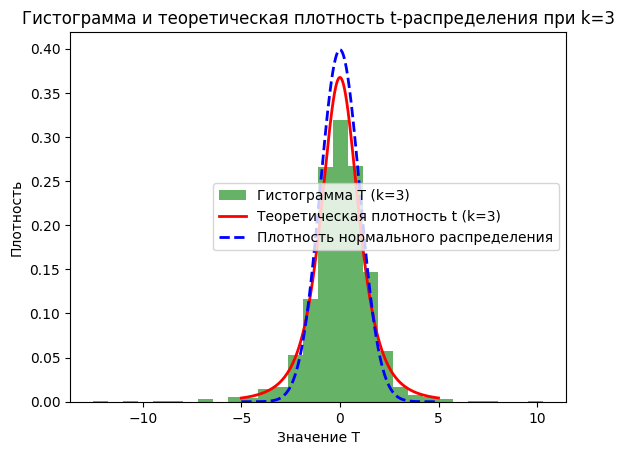

d1 = 3
χ² статистика: 37.54
p-значение: 0.0854074687
--------------------------------------------------
Гипотеза о соответствии t-распределению не отвергается.


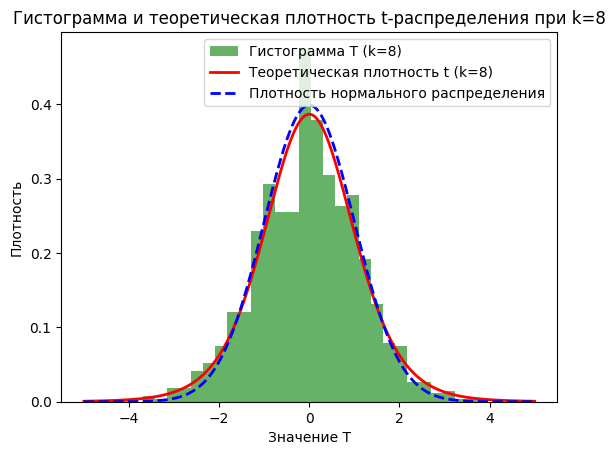

d1 = 8
χ² статистика: 35.16
p-значение: 0.1348007465
--------------------------------------------------
Гипотеза о соответствии t-распределению не отвергается.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, chi2

def generate_t_distribution(k, sample_size=1000, gamma=0.95):
    Y0 = np.random.normal(0, 1, sample_size)
    Y = np.random.normal(0, 1, (sample_size, k))

    T = Y0 / np.sqrt(np.sum(Y**2, axis=1) / k)
    plt.hist(T, bins=30, density=True, alpha=0.6, color='g', label=f'Гистограмма T (k={k})')
    x = np.linspace(-5, 5, 1000)
    plt.plot(x, t.pdf(x, k), 'r-', lw=2, label=f'Теоретическая плотность t (k={k})')
    plt.plot(x, norm.pdf(x, 0, 1), 'b--', lw=2, label='Плотность нормального распределения')
    plt.xlabel('Значение T')
    plt.ylabel('Плотность')
    plt.title(f'Гистограмма и теоретическая плотность t-распределения при k={k}')
    plt.legend()
    plt.show()

    observed_freq, bins = np.histogram(T, bins=30)
    expected_freq = t.cdf(bins[1:], k) - t.cdf(bins[:-1], k)
    expected_freq *= sample_size

    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    df = len(observed_freq) - 3
    p_value = 1 - chi2.cdf(chi2_stat, df)

    print(f'd1 = {k}')
    print(f'χ² статистика: {chi2_stat:.2f}')
    print(f'p-значение: {p_value:.10f}')
    print('-' * 50)

    if p_value > 1 - gamma:
        print("Гипотеза о соответствии t-распределению не отвергается.")
    else:
        print("Гипотеза отвергается.")

generate_t_distribution(3, sample_size=1000)
generate_t_distribution(8, sample_size=1000)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, chi2, f

def generate_distribution(distribution, params, sample_size=1000):
    """
    Генерация выборки для любого распределения.

    distribution: тип распределения (например, t, norm, chi2, f)
    params: параметры распределения (например, k для t-распределения)
    sample_size: размер выборки
    """
    if distribution == 't':
        k = params['k']
        Y0 = np.random.normal(0, 1, sample_size)
        Y = np.random.normal(0, 1, (sample_size, k))
        data = Y0 / np.sqrt(np.sum(Y**2, axis=1) / k)
        return data, t
    elif distribution == 'normal':
        mu = params['mu']
        sigma = params['sigma']
        data = np.random.normal(mu, sigma, sample_size)
        return data, norm
    elif distribution == 'chi2':
        df = params['df']
        data = np.random.chisquare(df, sample_size)
        return data, chi2
    elif distribution == 'f':
        d1 = params['d1']
        d2 = params.get('d2', 10)  # Установка d2 по умолчанию, если не передан
        Y1 = np.random.chisquare(d1, sample_size)
        Y2 = np.random.chisquare(d2, sample_size)
        data = (Y1 / d1) / (Y2 / d2)
        return data, f
    else:
        raise ValueError("Неизвестное распределение")

def chi_squared_test(data, distribution, params, bins=30):
    """
    Выполнение χ²-теста для соответствия данных теоретическому распределению.

    data: наблюдаемые данные
    distribution: тип распределения (например, t, norm, chi2, f)
    params: параметры распределения
    bins: количество интервалов для гистограммы
    """
    observed_freq, bin_edges = np.histogram(data, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    if distribution == 't':
        k = params['k']
        expected_freq = t.cdf(bin_edges[1:], k) - t.cdf(bin_edges[:-1], k)
    elif distribution == 'normal':
        mu = params['mu']
        sigma = params['sigma']
        expected_freq = norm.cdf(bin_edges[1:], mu, sigma) - norm.cdf(bin_edges[:-1], mu, sigma)
    elif distribution == 'chi2':
        df = params['df']
        expected_freq = chi2.cdf(bin_edges[1:], df) - chi2.cdf(bin_edges[:-1], df)
    elif distribution == 'f':
        d1 = params['d1']
        d2 = params.get('d2', 10)
        expected_freq = f.cdf(bin_edges[1:], d1, d2) - f.cdf(bin_edges[:-1], d1, d2)

    expected_freq *= len(data)  # Приведение к размеру выборки

    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    df = len(observed_freq) - 3  # df = количество интервалов - число параметров модели
    p_value = 1 - chi2.cdf(chi2_stat, df)

    return chi2_stat, p_value

def find_optimal_params(distribution, param_range, param_name, sample_size=1000, additional_params=None):
    """
    Поиск оптимальных параметров распределения, минимизирующих χ² статистику.

    distribution: тип распределения
    param_range: диапазон параметров
    param_name: имя параметра (например, 'k' для t-распределения)
    sample_size: размер выборки
    additional_params: дополнительные параметры, например, для f-распределения (d2)
    """
    if additional_params is None:
        additional_params = {}

    best_param = None
    min_chi2 = float('inf')

    for param in param_range:
        params = {param_name: param}
        params.update(additional_params)
        data, dist_func = generate_distribution(distribution, params, sample_size)
        chi2_stat, p_value = chi_squared_test(data, distribution, params)
        print(f'{param_name}={param}, χ² статистика: {chi2_stat:.2f}, p-значение: {p_value:.10f}')

        if chi2_stat < min_chi2:
            min_chi2 = chi2_stat
            best_param = param

    print(f'\nОптимальный {param_name}: {best_param} с минимальной χ² статистикой: {min_chi2:.2f}')
    return best_param

# Пример использования для t-распределения
print("Оптимальный k для t-распределения:")
find_optimal_params('t', param_range=range(1, 20), param_name='k')

# Пример использования для хи-квадрат распределения
print("\nОптимальный df для χ²-распределения:")
find_optimal_params('chi2', param_range=range(1, 20), param_name='df')

# Пример использования для F-распределения с фиксированным d2
print("\nОптимальный d1 для F-распределения (при фиксированном d2=10):")
find_optimal_params('f', param_range=range(1, 20), param_name='d1', additional_params={'d2': 10})

# Пример использования для нормального распределения с фиксированными параметрами mu и sigma
print("\nОптимальный mu для нормального распределения (при фиксированном sigma=1):")
find_optimal_params('normal', param_range=np.linspace(-5, 5, 20), param_name='mu', additional_params={'sigma': 1})



Оптимальный k для t-распределения:
k=1, χ² статистика: 172.30, p-значение: 0.0000000000
k=2, χ² статистика: 226.10, p-значение: 0.0000000000
k=3, χ² статистика: 39.27, p-значение: 0.0598900876
k=4, χ² статистика: 47.15, p-значение: 0.0095460200
k=5, χ² статистика: 52.44, p-значение: 0.0023483555
k=6, χ² статистика: 37.17, p-значение: 0.0918693649
k=7, χ² статистика: 29.34, p-значение: 0.3446209928
k=8, χ² статистика: 32.19, p-значение: 0.2250984859
k=9, χ² статистика: 37.77, p-значение: 0.0815619642
k=10, χ² статистика: 27.77, p-значение: 0.4229443112
k=11, χ² статистика: 25.33, p-значение: 0.5558523547
k=12, χ² статистика: 44.94, p-значение: 0.0165074457
k=13, χ² статистика: 34.64, p-значение: 0.1483153342
k=14, χ² статистика: 29.31, p-значение: 0.3460599020
k=15, χ² статистика: 121.37, p-значение: 0.0000000000
k=16, χ² статистика: 34.30, p-значение: 0.1575403474
k=17, χ² статистика: 39.05, p-значение: 0.0627316670
k=18, χ² статистика: 17.43, p-значение: 0.9199197860
k=19, χ² статисти

-0.7894736842105265